In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic=mp.solutions.holistic
mp_drawing=mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image,model):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable=False
    results=model.process(image)
    image.flags.writeable=True
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,results

In [4]:
def draw_landmarks(image,results):
    
     # Draw face landmarks with appropriate connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION)
    
    # Draw pose landmarks with appropriate connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp.solutions.pose.POSE_CONNECTIONS)
    
    # Draw left hand landmarks with appropriate connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)
    
    # Draw right hand landmarks with appropriate connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)


In [5]:
def draw_styled_landmarks(image,results):
    # Draw face landmarks with appropriate connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION,mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))
    
    # Draw pose landmarks with appropriate connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp.solutions.pose.POSE_CONNECTIONS,mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2))
    
    # Draw left hand landmarks with appropriate connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(121,22,76),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2))
    
    # Draw right hand landmarks with appropriate connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2))
    

In [6]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [7]:
cap=cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret,frame=cap.read()
        
        #make detections
        image,results=mediapipe_detection(frame,holistic)
        print(results)
        
        #draw landmarksq
        draw_styled_landmarks(image,results)
        
        #show to screen
        cv2.imshow('openCV Feed',image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):#destroy/break out gracefully
            break
    cap.release()
    cv2.destroyAllWindows() 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
results.pose_landmarks

landmark {
  x: 0.6243973970413208
  y: 0.3700083792209625
  z: -1.3727730512619019
  visibility: 0.9999613165855408
}
landmark {
  x: 0.662621796131134
  y: 0.28249821066856384
  z: -1.3083878755569458
  visibility: 0.9999028444290161
}
landmark {
  x: 0.6801705360412598
  y: 0.2837848365306854
  z: -1.3078839778900146
  visibility: 0.9998875856399536
}
landmark {
  x: 0.696826159954071
  y: 0.2862567901611328
  z: -1.3078060150146484
  visibility: 0.9998815655708313
}
landmark {
  x: 0.5945963859558105
  y: 0.2873958349227905
  z: -1.2905750274658203
  visibility: 0.9999181032180786
}
landmark {
  x: 0.5677973031997681
  y: 0.2908889949321747
  z: -1.2898756265640259
  visibility: 0.9999135732650757
}
landmark {
  x: 0.5436764359474182
  y: 0.2949014902114868
  z: -1.2899272441864014
  visibility: 0.999923586845398
}
landmark {
  x: 0.7318191528320312
  y: 0.3241440951824188
  z: -0.8331306576728821
  visibility: 0.9998785853385925
}
landmark {
  x: 0.5175256133079529
  y: 0.33412298

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame,results)

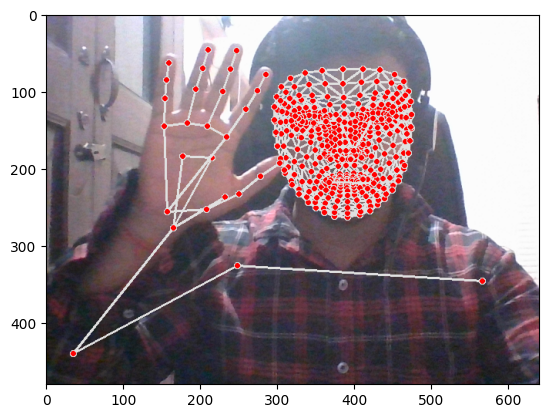

In [11]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

<3> Extract Key Point Values

In [12]:
len(results.pose_landmarks.landmark)

33

In [13]:
pose=[]
for res in results.pose_landmarks.landmark:
    test=np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [14]:
pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten()

In [15]:
lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [16]:
#len(results.face_landmarks.landmark)*3

In [17]:
def extract_keypoints(results):
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    return np.concatenate([pose,face,lh,rh])

In [18]:
result_test=extract_keypoints(results)[:-10]
result_test

array([ 0.6243974 ,  0.37000838, -1.37277305, ..., -0.05015528,
        0.24002525,  0.3024587 ])

In [19]:
#np.save('0',result_test)

########setting up folders

In [20]:
DATA_PATH=os.path.join('MP_Data')
actions=np.array(['hello','thanks','sorry','bye'])
no_sequences=20
sequence_length=20

In [21]:
#for action in actions:
 #   for sequence in range(no_sequences):
  #      try:
   #         os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
    #    except:
     #       pass    

In [22]:
#cap=cv2.VideoCapture(0)
#set mediapipe model
#with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
 #   for action in actions:
  #      for sequence in range(no_sequences):
   #         for frame_num in range(sequence_length):
    #            ret,frame=cap.read()
     #   
      #          #make detections
       #         image,results=mediapipe_detection(frame,holistic)
        #        
         #       #draw landmarksq
               # draw_styled_landmarks(image,results)
                
               # if frame_num==0:
               #     cv2.putText(image,'STARTING COLLECTION',(120,200),
                #                cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)
               #     cv2.putText(image,'collecting frames for {} Video Number {}'.format(action,sequence),(15,12),
                #                cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),4,cv2.LINE_AA)
               #     cv2.imshow('openCV Feed',image)
              #      cv2.waitKey(2000)
             #   
            #    else:
           #         cv2.putText(image,'collecting frames for {} Video Number {}'.format(action,sequence),(15,12),
          #                      cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),4,cv2.LINE_AA)
         #           cv2.imshow('openCV Feed',image)
        #            
       #         keypoints=extract_keypoints(results)
      #          npy_path=os.path.join(DATA_PATH,action,str(sequence),str(frame_num)) 
     #           np.save(npy_path,keypoints)   
    #            
   #             
  #              if cv2.waitKey(10) & 0xFF == ord('q'):#destroy/break out gracefully
  #                  break
 #  cap.release()
#    cv2.destroyAllWindows()    

####preprocess data and create labels and features

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [24]:
label_map={label:num for num,label in enumerate(actions)}

In [25]:
label_map

{'hello': 0, 'thanks': 1, 'sorry': 2, 'bye': 3}

In [26]:
sequences,labels=[],[]
for action in actions:
    for sequence in range(no_sequences):
        window=[]
        for frame_num in range(sequence_length):
            res=np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])    

In [27]:
x=np.array(sequences)
x.shape

(80, 20, 1662)

In [28]:
y=to_categorical(labels).astype(int)
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0,

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05)

In [30]:
x_train.shape

(76, 20, 1662)

Build and train LSTM Neural Network

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard

In [49]:
log_dir=os.path.join('Logs')
tb_callback=TensorBoard(log_dir=log_dir)

In [123]:
from tensorflow.keras.layers import Dropout,BatchNormalization
model=Sequential()
model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(20,1662)))
model.add(Dropout(0.2))
model.add(LSTM(128,return_sequences=True,activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=False,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 20, 64)            442112    
                                                                 
 dropout (Dropout)           (None, 20, 64)            0         
                                                                 
 lstm_17 (LSTM)              (None, 20, 128)           98816     
                                                                 
 dropout_1 (Dropout)         (None, 20, 128)           0         
                                                                 
 lstm_18 (LSTM)              (None, 64)                49408     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                      

In [124]:
model.compile(loss = "categorical_crossentropy", optimizer = 'Adam', metrics=['categorical_accuracy'])

In [125]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping_monitor = EarlyStopping(patience = 40)

In [126]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200,callbacks=[tb_callback])

Epoch 1/200
3/3 [==============================] - ETA: 0s - loss: 1.5631 - categorical_accuracy: 0.1842

TypeError: in user code:


    TypeError: tf__shard_test_function() missing 2 required positional arguments: 'total_shards' and 'shard_idx'


Make predictions

In [ ]:
res=model.predict(x_test)

1/1 [==============================] - 2s 2s/step


In [ ]:
actions[np.argmax(res[1])]

'hello'

In [ ]:
actions[np.argmax(y_test[1])]

'bye'

save weights

In [ ]:
model.save('action.h5')
#del model
#model.load_weights('action.h5')

c:\Users\shubh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  for trackable_obj in self._self_tracked_trackables:


Evaluation using confusion matrix and accuracy

In [ ]:
from sklearn.metrics import  multilabel_confusion_matrix,accuracy_score

In [ ]:
yhat=model.predict(x_train)

3/3 [==============================] - 0s 30ms/step


In [ ]:
ytrue=np.argmax(y_train,axis=1).tolist()
yhat=np.argmax(yhat,axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[ 0, 57],
        [ 0, 19]],

       [[57,  0],
        [19,  0]],

       [[56,  0],
        [20,  0]],

       [[58,  0],
        [18,  0]]], dtype=int64)

In [ ]:
accuracy_score(ytrue,yhat)

0.25

Testing

In [ ]:
# from scipy import stats

In [ ]:
# colors = [(245,117,16), (117,245,16), (16,117,245)]
# def prob_viz(res, actions, input_frame, colors):
#     output_frame = input_frame.copy()
#     for num, prob in enumerate(res):
#         cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
#         cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
#     return output_frame

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.9

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-20:]
        
        if len(sequence) == 20:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 6: 
                sentence = sentence[-6:]

            # Viz probabilities
            # image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti